In [1]:
import pandas as pd
import numpy as np
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Read the data

In [2]:
# Load the dataset
data = pd.read_csv("SpotifyPlaylist.csv")

In [3]:
data

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \nAnd..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \nTouch me gentl..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \nWhy I had t...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...
...,...,...,...,...
57645,Ziggy Marley,Good Old Days,/z/ziggy+marley/good+old+days_10198588.html,Irie days come on play \nLet the angels fly l...
57646,Ziggy Marley,Hand To Mouth,/z/ziggy+marley/hand+to+mouth_20531167.html,Power to the workers \nMore power \nPower to...
57647,Zwan,Come With Me,/z/zwan/come+with+me_20148981.html,all you need \nis something i'll believe \nf...
57648,Zwan,Desire,/z/zwan/desire_20148986.html,northern star \nam i frightened \nwhere can ...


# Data Visualization

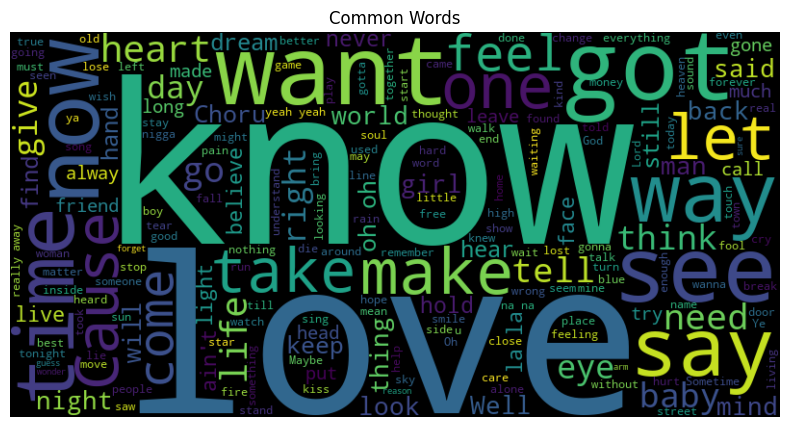

In [4]:
# Combining all song lyrics into a single text
lyrics = ' '.join(data['text'].tolist())
  
wordcloud = WordCloud(width=800, height=400,
                      background_color='black').generate(lyrics)
 
plot = plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words')
plt.show()
plot.savefig('wordcloud.png', bbox_inches='tight')

# Data Preprocessing


In [5]:
import string
stop_words = [
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", 
    "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", 
    "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", 
    "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", 
    "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", 
    "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", 
    "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", 
    "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", 
    "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", 
    "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", 
    "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", 
    "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"
]

# remove the stop words
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)
    
## clean the data
def clean_text(text):
    # remove text in square brackets
    text = re.sub('\[.*?\]', '', text)
    # removing punctuations
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    # removing words containing digits
    text = re.sub('\w*\d\w*', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove the stop words
    text = remove_stopwords(text)
    return text

In [6]:
print("Before: \n",data['text'][0])
print("After:\n",clean_text(data['text'][0]))

Before: 
 Look at her face, it's a wonderful face  
And it means something special to me  
Look at the way that she smiles when she sees me  
How lucky can one fellow be?  
  
She's just my kind of girl, she makes me feel fine  
Who could ever believe that she could be mine?  
She's just my kind of girl, without her I'm blue  
And if she ever leaves me what could I do, what could I do?  
  
And when we go for a walk in the park  
And she holds me and squeezes my hand  
We'll go on walking for hours and talking  
About all the things that we plan  
  
She's just my kind of girl, she makes me feel fine  
Who could ever believe that she could be mine?  
She's just my kind of girl, without her I'm blue  
And if she ever leaves me what could I do, what could I do?


After:
 look face wonderful face means something special look way smiles sees lucky one fellow shes kind girl makes feel fine could ever believe could mine shes kind girl without im blue ever leaves could could go walk park hold

In [7]:
data['cleaned_lyrics'] = data['text'].apply(clean_text)

# 1.Mood Clasifier algorithm

In [8]:
# Implementing a simple Vader algorithm using the publically available vader lexicon.
# Using the lexicon text file from the orignal VADER implementation
class CustomVADER:
    def __init__(self):
        # Load the sentiment lexicon
        self.lexicon = self.load_lexicon()

    def load_lexicon(self):
        lexicon = {}
        with open("vader_lexicon.txt", "r", encoding="utf-8") as f:
            lines = f.readlines()
            for line in lines:
                word, score, _, _ = line.strip().split("\t")
                lexicon[word] = float(score)
        return lexicon

    def analyze_sentiment(self, text):
        # tokenize the sentence's
        words = text.split()

        # Analyze sentiment
        pos_score = 0
        neg_score = 0
        for word in words:
            if word in self.lexicon:
                score = self.lexicon[word]
                if score > 0:
                    pos_score += score
                elif score < 0:
                    neg_score += score

        # Calculate compound score
        compound_score = pos_score + neg_score

        # Classify sentiment
        if compound_score >= 0.05:
            sentiment = "Positive"
        elif compound_score <= -0.05:
            sentiment = "Negative"
        else:
            sentiment = "Neutral"

        return {
            "positive_score": pos_score,
            "negative_score": neg_score,
            "compound_score": compound_score,
            "sentiment": sentiment
        }

In [9]:
def get_sentiment_score(text):
     sentiment_analyser = CustomVADER()
     score = sentiment_analyser.analyze_sentiment(text)
     return score['compound_score']

In [10]:
data['sentiment_score'] = data['cleaned_lyrics'].apply(get_sentiment_score)

## Implementing KMeans so we can group the songs into categories based on their sentiment scores

In [11]:
class CustomKMeans:
    def __init__(self, n_clusters, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def fit(self, X):
        # Initialize centroids randomly
        self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]
        
        for _ in range(self.max_iter):
            # Assign each data point to the nearest centroid
            labels = self._assign_clusters(X)
            
            # Update centroids based on the mean of data points assigned to each cluster
            new_centroids = self._update_centroids(X, labels)
            
            # Check for convergence
            if np.allclose(self.centroids, new_centroids):
                break
                
            self.centroids = new_centroids
                
    def _assign_clusters(self, X):
        # Compute distances between each data point and centroids
        distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
        
        # Assign each data point to the nearest centroid
        return np.argmin(distances, axis=0)
    
    def _update_centroids(self, X, labels):
        new_centroids = np.zeros_like(self.centroids)
        for i in range(self.n_clusters):
            # Compute mean of data points assigned to each cluster
            cluster_points = X[labels == i]
            if len(cluster_points) > 0:
                new_centroids[i] = np.mean(cluster_points, axis=0)
            else:
                # If no data points are assigned to a cluster, keep the centroid unchanged
                new_centroids[i] = self.centroids[i]
        return new_centroids

## Train the model

In [12]:
# Custom K-means Implementation
kmeans = CustomKMeans(n_clusters=5)  # Assuming 5 mood categories
X =  np.array(data['sentiment_score']).reshape(-1, 1)
kmeans.fit(X)

# Interpret Clusters as Mood Categories
cluster_labels = kmeans._assign_clusters(X)

# Output the results
data['mood_category'] = cluster_labels
print(data[['artist', 'song', 'mood_category']])

             artist                   song  mood_category
0              ABBA  Ahe's My Kind Of Girl              2
1              ABBA       Andante, Andante              1
2              ABBA         As Good As New              1
3              ABBA                   Bang              1
4              ABBA       Bang-A-Boomerang              1
...             ...                    ...            ...
57645  Ziggy Marley          Good Old Days              2
57646  Ziggy Marley          Hand To Mouth              4
57647          Zwan           Come With Me              4
57648          Zwan                 Desire              2
57649          Zwan              Heartsong              2

[57650 rows x 3 columns]


## Analyze the groups and their sentiments

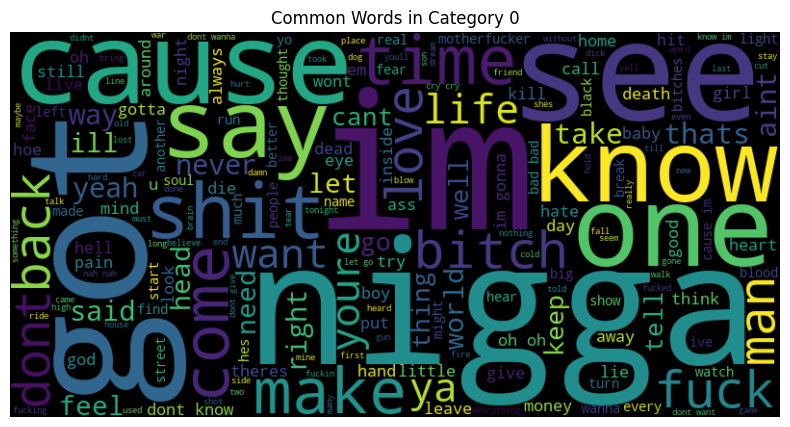

Average score of category 0 is -43.10154202004624


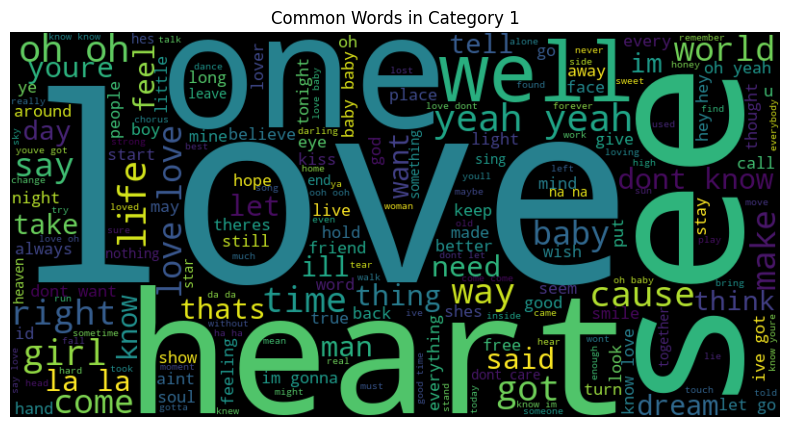

Average score of category 1 is 41.06456088053196


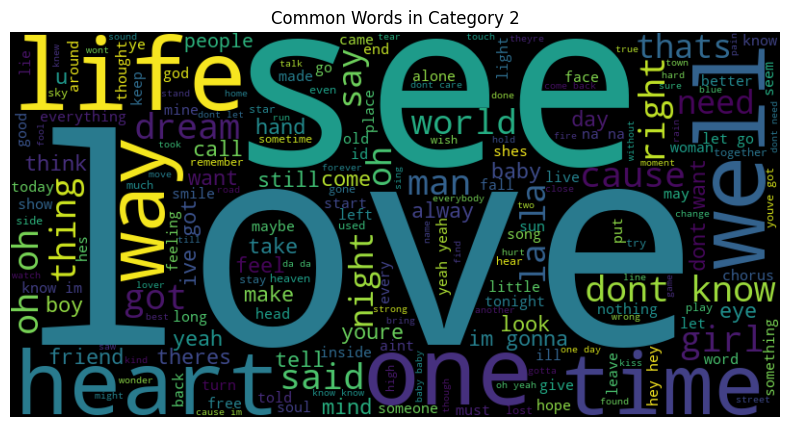

Average score of category 2 is 14.907392895586788


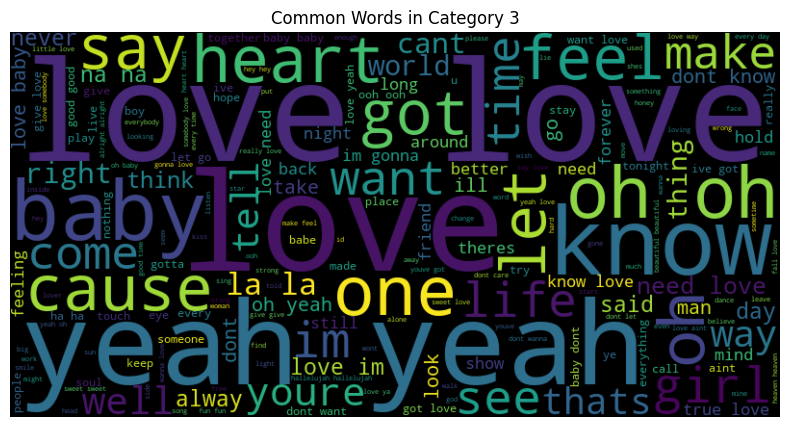

Average score of category 3 is 95.28694481830398


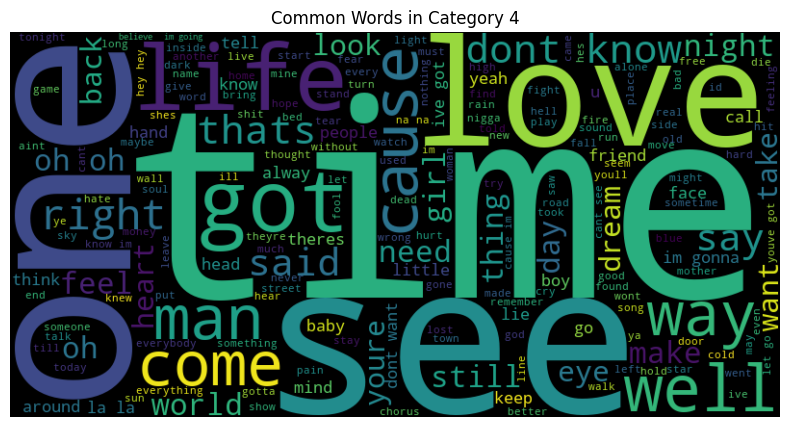

Average score of category 4 is -3.539014012856661


In [13]:

for i in range(0,5):
    categorized_data = data[data['mood_category'] == i]
    lyrics = ' '.join(categorized_data['cleaned_lyrics'].tolist())
    wordcloud = WordCloud(width=800, height=400,
                          background_color='black').generate(lyrics)
     
    plot = plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Common Words in Category '+str(i))
    plt.show()
    plot.savefig('wordcloud.png', bbox_inches='tight')

    print(f"Average score of category {i} is {sum(categorized_data['sentiment_score'])/len(categorized_data)}")

In [14]:
## Based on the analyzed data lets categorize them into different moods

# category 0 has a very high negative score and strong angry words   avg : -45
# category 1 has a very low positive score and nice emotions like love and feel etc,   avg : 14.05
# category 2 has a low negative score and words describing sad emotions,   avg:  -4.8
# category 3 has a high positive score and high frequency of good feel words,   avg : 40.55
# category 4 has a very high positive score indicating an state of euphoria,   avg : 95



# Based on average score and analyzed words group them into different moods.        
mood_category =  {}
for i in range(0,5):
    categorized_data = data[data['mood_category'] == i]
    lyrics = ' '.join(categorized_data['cleaned_lyrics'].tolist())
    score = sum(categorized_data['sentiment_score'])/len(categorized_data)
    # print(i, score)
    # Interpret sentiment scores
    if score >= 75:
        mood_category[i] = 'Euphoria'
    elif score >= 35:
        mood_category[i] =  'Happy'
    elif score <= -25:
        mood_category[i] =  'Angry'
    elif score <= 5:
        mood_category[i] =  'Sad'
    elif score > 5 and score < 35:
        mood_category[i] =  'Relaxed'

def analyze_sentiment(category): 
    return mood_category[category]
data['mood'] = data['mood_category'].apply(analyze_sentiment)

In [15]:
print(data[['artist', 'song', 'mood']])

             artist                   song     mood
0              ABBA  Ahe's My Kind Of Girl  Relaxed
1              ABBA       Andante, Andante    Happy
2              ABBA         As Good As New    Happy
3              ABBA                   Bang    Happy
4              ABBA       Bang-A-Boomerang    Happy
...             ...                    ...      ...
57645  Ziggy Marley          Good Old Days  Relaxed
57646  Ziggy Marley          Hand To Mouth      Sad
57647          Zwan           Come With Me      Sad
57648          Zwan                 Desire  Relaxed
57649          Zwan              Heartsong  Relaxed

[57650 rows x 3 columns]


## Classify the mood a new lyrics

In [17]:
lyrics = input("Please enter song lyrics\n")
cleaned_lyrics = clean_text(lyrics)
score = get_sentiment_score(cleaned_lyrics)
category = kmeans._assign_clusters(score)[0]
mood = analyze_sentiment(category)
print("\n\nMood Detected: ",mood )

Please enter song lyrics
 "There's a gentleness to everything you do  \nAnd it's rubbing off on me I feel it too  \nI've been waiting but my loneliness I get  \nWhen you call me on the phone  \nAnd I'm feeling so alone  \nWhen you ask me to come over  \nBaby you know I will  \nI could never stay on my own  \n  \nGivin' it all I got to give  \nI've never done that before  \nI'm always givin' a little more  \nWhen I'm with you  \n  \nGivin' it all I got to give  \nI've never done that before  \nI'm always givin' a little more  \nWhen I'm with you  \nI'm always givin' a little more  \nWhen I'm with you  \n  \nGivin' it all I got to give  \nI've never done that before  \nI'm always givin' a little more  \nWhen I'm with you  \nGivin' it all I got to give  \nI've never done that before  \nI'm always givin' a little more\n\n"




Mood Detected:  Sad


# 2. Lyrics Generator

In [18]:
import random
from collections import defaultdict
# A simple function to clean the corpus
def preprocess_corpus(corpus):
    # Convert to lowercase and remove punctuation
    corpus = corpus.lower()
    corpus = ''.join([c for c in corpus if c.isalnum() or c.isspace()])
    return corpus.split()
    
# A simple function to build a ngram model based on categorized lyrics
def build_ngram_model(tokens, n):
    ngram_model = defaultdict(list)
    for i in range(len(tokens) - n):
        ngram = tuple(tokens[i:i+n-1])
        next_word = tokens[i+n-1]
        ngram_model[ngram].append(next_word)
    return ngram_model

# A function to use the model to generate a new song
def generate_song(ngram_model, seed_phrase, length):
    song = list(seed_phrase)
    current_seed = tuple(seed_phrase)
    
    for _ in range(length):
        next_words = ngram_model[current_seed]
        if not next_words:
            next_word = random.choice(list(ngram_model.keys()))[-1]  # Fallback to a random word from any n-gram
        else:
            next_word = random.choice(next_words)
        song.append(next_word)
        current_seed = tuple(song[-len(seed_phrase):])
        
    return ' '.join(song)

In [19]:

models = {}
tokens = {}
# Lets build a trigram model with n =3 for each category
n = 3  # You can adjust n for different n-gram sizes
for i in range(0,5):
    corpus = ' '.join(data[data['mood_category']==i]['text'].tolist())
    tokens[i] = preprocess_corpus(corpus)
    models[i] = build_ngram_model(tokens[i], n)

## Generate a song

In [20]:
def generate(category):
    song_length = 100  # Length of the generated song in words
    ngram_model = models[category]
    seed_phrase = random.choices(tokens[category], k=2)  # Seed phrase to start the song
    generated_song = generate_song(ngram_model, seed_phrase, song_length)
    return generated_song


In [21]:
# Get mood from the user
print("Please select the mood category you are intersted in: \n",mood_category)
category = int(input())
generated_song = generate(category)
print("\n\nHere's your song:")
print(generated_song)

Please select the mood category you are intersted in: 
 {0: 'Angry', 1: 'Happy', 2: 'Relaxed', 3: 'Euphoria', 4: 'Sad'}


 4




Here's your song:
us i cant stay your not even friends dont come wolf within boy cried out gaily on the boogie said up jump the moon you tell the truth tell me when she woke up waiting for the people what she had unfaithful ways made a promise not a soul poem and shes not the way no one oh this is goodbye goodbye goodbye yeah goodbye again goodbye again as the real niggas do real things lets get away from me too and i just kept crying with no escaping any way now they hunt me like im on the wall legend in


## Evaluating the Ngram model

In [22]:
def calculate_perplexity(ngram_model, generated_song):
    total_log_prob = 0.0
    n = len(list(ngram_model.keys())[0]) + 1  # n-gram size
    
    for i in range(len(generated_song) - n + 1):
        ngram = tuple(generated_song[i:i+n-1])
        next_word = generated_song[i+n-1]
        
        if ngram in ngram_model:
            next_words = ngram_model[ngram]
            word_count = next_words.count(next_word) + 1  # Apply Laplace smoothing
            total_count = len(next_words)+1  # Add the smoothing constant to the denominator
            word_prob = word_count / total_count
        else:
            word_prob = 1 / len(ngram_model.keys())  # Uniform probability for unseen n-grams
        total_log_prob += np.log2(word_prob)
    
    perplexity = 2 ** (-total_log_prob / len(generated_song))
    return perplexity if perplexity != float('inf') else float('inf')


In [23]:
# Lets evalute the perplexity of model for each mood
for i in range (0,5):
    model = models[i]
    song = generate(i)
    # print(song)
    perplexity = calculate_perplexity(model, song.split())
    print(f"\nPerplexity of Model {i}:", perplexity)


Perplexity of Model 0: 3.1429705513635193

Perplexity of Model 1: 9.953977002926772

Perplexity of Model 2: 11.41251240290311

Perplexity of Model 3: 2.775269860862885

Perplexity of Model 4: 9.981717695950492
